In [16]:
import os

def change_dir_in_hipergator():
    # this env var is set on hipergator (SLURM is the job scheduler there)
    if os.getenv("SLURM_JOB_ID", None):
        target_dir = "diff_fam_social_memory_ephys"
        current = os.getcwd()

        while True:
            parent = os.path.dirname(current)
            # If we've reached the root directory without finding the target
            if parent == current:
                raise FileNotFoundError(f"Could not find parent directory '{target_dir}'")

            # Check if the target directory is the current parent's name
            if os.path.basename(parent) == target_dir:
                os.chdir(parent)
                return parent

            current = parent

# Usage
try:
    new_path = change_dir_in_hipergator()
    print(f"Successfully changed to directory: {new_path}")
except FileNotFoundError as e:
    print(e)
    

Successfully changed to directory: None


In [17]:
import pickle
import behavior.boris_extraction as boris
#import spike.spike_analysis. as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from itertools import combinations
import pandas as pd
import os
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))
    
behavior_dicts = unpickle_this("pilot2/cups_phase4/cups_behavior_dicts.pkl")

In [18]:
cup_dict = {'4.4':['cagemate', 'novel', 'familiar', 'empty'],
            '1.3': ['empty', 'cagemate', 'novel', 'familiar'],
            '2.1': ['familiar', 'empty', 'cagemate', 'novel'],
            '3.1': ['novel', 'familiar', 'empty', 'cagemate'],
            '1.1': ['cagemate', 'novel', 'familiar', 'empty'],
            '2.2': ['empty', 'cagemate', 'novel', 'familiar'],
            '2.3': ['familiar', 'empty', 'cagemate', 'novel'],
            '3.2': ['novel', 'familiar', 'empty', 'cagemate'],
            '2.4': ['familiar', 'empty', 'cagemate', 'novel'],
            '4.1': ['cagemate', 'novel', 'familiar', 'empty']}

color_dict = {'4.4':['orange', 'blue', 'green', 'pink'],
            '1.3': ['green', 'pink', 'orange', 'blue'],
            '2.1': ['orange', 'blue', 'green', 'pink'],
            '3.1': ['green', 'pink', 'orange', 'blue'],
            '1.1':['orange', 'blue', 'green', 'pink'],
            '2.2': ['green', 'pink', 'orange', 'blue'],
            '2.3': ['orange', 'blue', 'green', 'pink'],
            '3.2': ['green', 'pink', 'orange', 'blue'],
            '2.4': ['orange', 'blue', 'green', 'pink'],
            '4.1': ['orange', 'blue', 'green', 'pink']}



In [19]:

# folder_path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\cups"
# behavior_dicts = {}
# # Loop through each file in the folder
# for filename in os.listdir(folder_path):
#     boris_excel = os.path.join(folder_path, filename)
#     ex_boris = pd.read_csv(boris_excel)
#     times = ex_boris[
#         (ex_boris['Behavior'] == 'mouse in'
#          ) | (ex_boris['Behavior'] == 'mouse out'
#         )]['Start (s)'].values
#     subject = filename.split("_")[0]
#     subject = str(float(subject)/10)
#     agentorder = cup_dict[subject]
#     fam_behaviors = ["sniff cup " + str(agentorder.index('familiar') + 1),
#                      "chew cup " + str(agentorder.index('familiar') + 1)]
#     cagemate_behaviors = ["sniff cup " + str(agentorder.index('cagemate') + 1),
#                      "chew cup " + str(agentorder.index('cagemate') + 1)]
#     novel_behaviors = ["sniff cup " + str(agentorder.index('novel')+ 1),
#                      "chew cup " + str(agentorder.index('novel')+ 1)]
#     empty_behaviors = ["sniff cup " + str(agentorder.index('empty')+ 1),
#                      "chew cup " + str(agentorder.index('empty')+ 1)]
#     baseline_behaviors = ['sniff cup 1', 'chew cup 1',
#                           'sniff cup 2', 'chew cup 2',
#                           'sniff cup 3', 'chew cup 3',
#                           'sniff cup 4', 'chew cup 4']
#     fam_empty_behaviors = [item for item in baseline_behaviors if item not in fam_behaviors]
#     baseline_df = ex_boris[ex_boris["Start (s)"] < times[0]]
#     familiarization_df = ex_boris[(ex_boris["Start (s)"] > times[0]) &
#                                   (ex_boris['Start (s)'] < times[1])]
#     iti_df = ex_boris[(ex_boris["Start (s)"] > times[1]) &
#                                   (ex_boris['Start (s)'] < times[2])]
#     last10min_df = ex_boris[ex_boris["Start (s)"] > times[-1]]
#     novel_array = boris.get_behavior_bouts(last10min_df, ["subject"], novel_behaviors)
#     empty_array = boris.get_behavior_bouts(last10min_df, ["subject"], empty_behaviors)
#     cagemate_array = boris.get_behavior_bouts(last10min_df, ["subject"], cagemate_behaviors)
#     fam_array = boris.get_behavior_bouts(last10min_df, ["subject"], fam_behaviors)
#     acq_array = boris.get_behavior_bouts(familiarization_df, ["subject"], fam_behaviors)
#     empty_acq_array = boris.get_behavior_bouts(familiarization_df, ["subject"],
#                                                fam_empty_behaviors)
#     cup1_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
#                                           ['sniff cup 1', 'chew cup 1'])
#     cup2_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
#                                           ['sniff cup 2', 'chew cup 2'])
#     cup3_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
#                                           ['sniff cup 3', 'chew cup 3'])
#     cup4_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
#                                           ['sniff cup 4', 'chew cup 4'])
#     behavior_dicts[subject] = {'cup 1': cup1_array,
#                                'cup 2': cup2_array,
#                                'cup 3': cup3_array,
#                                'cup 4': cup4_array,
#                                'acquisition': acq_array,
#                                'empty acquisition': empty_acq_array,
#                                'familiar': fam_array,
#                                'novel': novel_array,
#                                'cagemate':cagemate_array,
#                                'empty': empty_array}
                     
#     pickle_this(behavior_dicts, "cups_behavior_dicts.pkl")

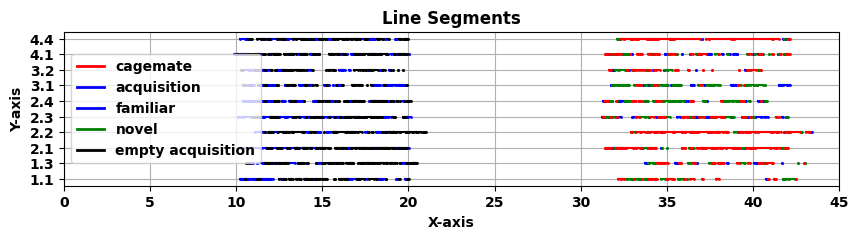

In [20]:
color_dict = {'cagemate': 'r', 'acquisition': 'b', 'familiar': 'b', 'novel': 'g',
              'empty acquisition' : 'k'}
recording_number = 0
plt.figure(figsize = (10,2))
labels = []
for name, recording in behavior_dicts.items():
    labels.append(name)
    for event, snippets in recording.items():
        if (event =='cagemate'
            ) | (event == 'familiar'
                 ) | (event == 'novel'
                      ) | (event == 'acquisition'
                    ) | (event == 'empty acquisition'):
            for i in range(len(snippets)):
                y = [recording_number,recording_number]
                x = snippets[i]/1000/60
            # Plot the line segments
                plt.plot(x, y, marker='o', linestyle='-', c= color_dict[event], markersize = 1)
    recording_number += .5
# Optionally, you can add labels, title, etc.
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.yticks(ticks=np.arange(len(labels))/2, labels=labels)
plt.title('Line Segments')
legend_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
plt.legend(handles=legend_labels)
plt.grid(True)
plt.xlim([0,45])
plt.show()

In [21]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
subject_info = {}
for subject, behavior_dict in behavior_dicts.items():
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if subject in event_info.keys():
            dict_event = event_info[subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[subject] =  dict_event
        else:
            event_info[subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs)


1462
5128


In [22]:
data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['total time'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
behaviors = behaviors[4:10]
print(behaviors)
print(data_points.shape)
data_points = data_points[4:10,:] 
print(data_points.shape)

['1.1', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '4.1', '4.4']
['acquisition', 'empty acquisition', 'familiar', 'familiar_baseline', 'cagemate_baseline', 'novel_baseline']
(18, 10)
(6, 10)


In [23]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview
event_temp = event_overview.drop('level_0', axis = 1)
event_overview_averages = event_temp.groupby('level_1').mean()
event_overview_averages

,cup 1,cup 2,cup 3,cup 4,acquisition,empty acquisition,familiar,familiar_baseline,cagemate_baseline,novel_baseline,empty_baseline,novel,cagemate,empty,pink,orange,blue,green
level_1,,,,,,,,,,,,,,,,,,
avg event,2.899749,2.771093,3.229477,3.430529,4.965829,3.174697,2.228736,2.839263,2.854985,3.459148,3.177453,4.675568,6.195815,2.782732,4.033648,2.410163,3.66321,2.580403
no_events,24.500000,24.900000,30.900000,30.300000,34.900000,60.000000,14.300000,24.300000,26.500000,31.800000,28.000000,23.300000,29.500000,13.600000,24.600000,30.400000,26.40000,34.600000
total time,67.897800,69.388200,97.997200,103.123500,141.404300,189.446400,36.678200,69.624200,76.591300,106.701100,85.490100,90.459300,192.539300,42.678500,95.227000,77.559000,92.70800,93.572000


In [24]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_cup_time_averages = {}
for event in event_dict_keys:
    if 'cup' in event:
        avg_event = event_total_time[event].mean()
        event_cup_time_averages[event] = avg_event
event_cup_time_averages

{'cup 1': 67.89780000000005,
 'cup 2': 69.38819999999998,
 'cup 3': 97.99720000000002,
 'cup 4': 103.1235}

In [25]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        sem_event = sem(event_total_time[event])
        event_agent_time_averages[event] = (avg_event, sem_event)
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_time_averages

{'acquisition': (141.40429999999998, 14.846394468429768),
 'empty acquisition': (189.44640000000007, 24.193884164391605),
 'familiar': (36.6782, 12.505309766299717),
 'familiar_baseline': (69.6242, 10.407176887769971),
 'cagemate_baseline': (76.59130000000002, 8.068543528281774),
 'novel_baseline': (106.70110000000004, 16.059073405848938),
 'empty_baseline': (85.4901, 7.020017843361304),
 'novel': (90.4592999999999, 17.853218774246578),
 'cagemate': (192.53930000000005, 55.8117314567565),
 'empty': (42.67850000000003, 11.482647438877313),
 'pink': (95.22699999999995, 2.05675488735696),
 'orange': (77.5590000000001, 13.074559750395649),
 'blue': (92.70799999999993, 2.05675488735696),
 'green': (93.57200000000006, 13.074559750395649)}

['1.1', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '4.1', '4.4']
acquisition
[135.531 103.732 187.465 113.262 241.457 130.54  152.335 113.996  76.86
 158.865]
empty acquisition
[150.932 254.792 251.925 315.384 149.859 129.401  62.463 133.398 208.116
 238.194]
familiar
[  7.4    25.265  16.33   15.134 130.797  36.668  77.932   9.665  40.926
   6.665]
familiar_baseline
[ 77.133  49.665  78.335 119.791  60.464  34.199  35.93   37.534  77.593
 125.598]
cagemate_baseline
[ 49.266  85.795  70.735 107.998 100.392  82.867  73.468  40.135 109.724
  45.533]
novel_baseline
[ 62.735 185.394 169.931 118.798 169.793  85.134  76.064  55.     56.492
  87.67 ]


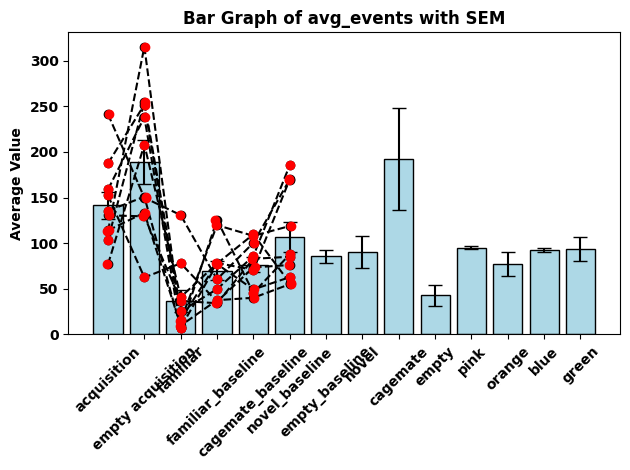

In [26]:
print(subjects)
x = np.arange(len(avg_events))
labels = event_agent_time_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    print(behaviors[i])
    print(data_points[i])
    # Spread the points a little horizontally to avoid overlap (add a small random jitter)
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    plt.scatter([i + jitter_val for jitter_val in jitter], group_data, color='red', zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

# Add labels and title
plt.xticks(x, labels, rotation = 45)
plt.ylabel('Average Value')
plt.title('Bar Graph of avg_events with SEM')

# Show the plot
plt.tight_layout()
plt.show()



In [27]:
event_agent_time_averages 
avg_events = [event_agent_time_averages['novel'][0], 
              event_agent_time_averages['familiar'][0],
              event_agent_time_averages['cagemate'][0]]
sem_events = [event_agent_time_averages['novel'][1], 
              event_agent_time_averages['familiar'][1],
              event_agent_time_averages['cagemate'][1]]


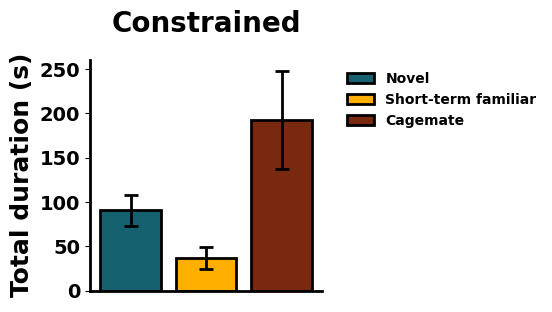

In [28]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(color_id_dict.keys(), avg_events, yerr = sem_events,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Total duration (s)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

In [29]:
total_time_df = event_overview[event_overview['level_1'] == 'total time']
avg_event_df = event_overview[event_overview['level_1'] == 'avg event']
no_events_df = event_overview[event_overview['level_1'] == 'no_events']

total_time_long_df = pd.melt(total_time_df, id_vars = ['level_0'],
                            value_vars = ['novel', 'cagemate','familiar'],
                            var_name = 'condition', value_name = 'time')

total_time_long_df

,level_0,condition,time
0,1.1,novel,120.868
1,1.3,novel,61.466
2,2.1,novel,55.867
3,2.2,novel,35.533
4,2.3,novel,140.200
5,2.4,novel,154.866
6,3.1,novel,188.134
7,3.2,novel,71.333
8,4.1,novel,56.994
9,4.4,novel,19.332


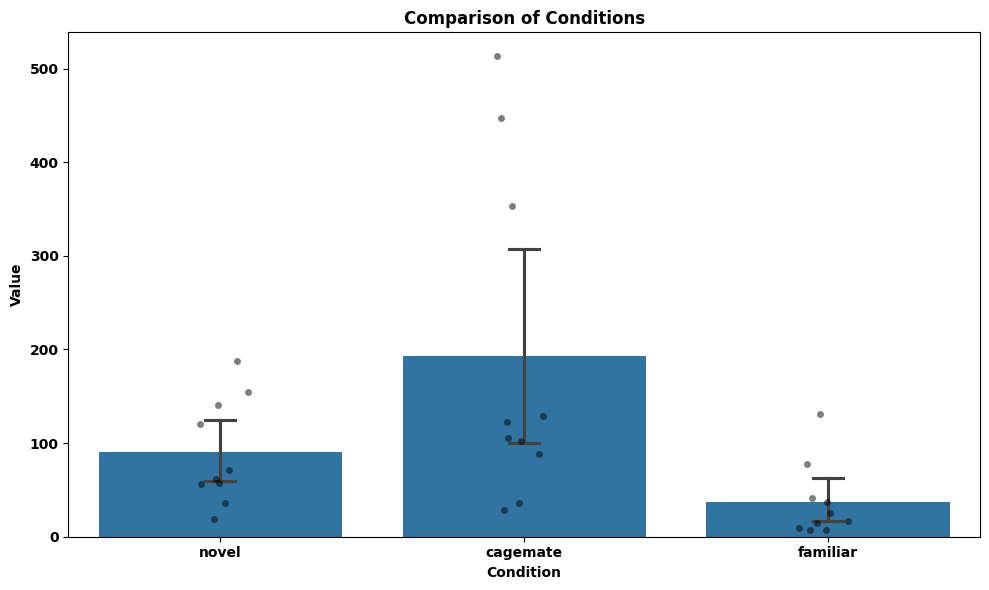

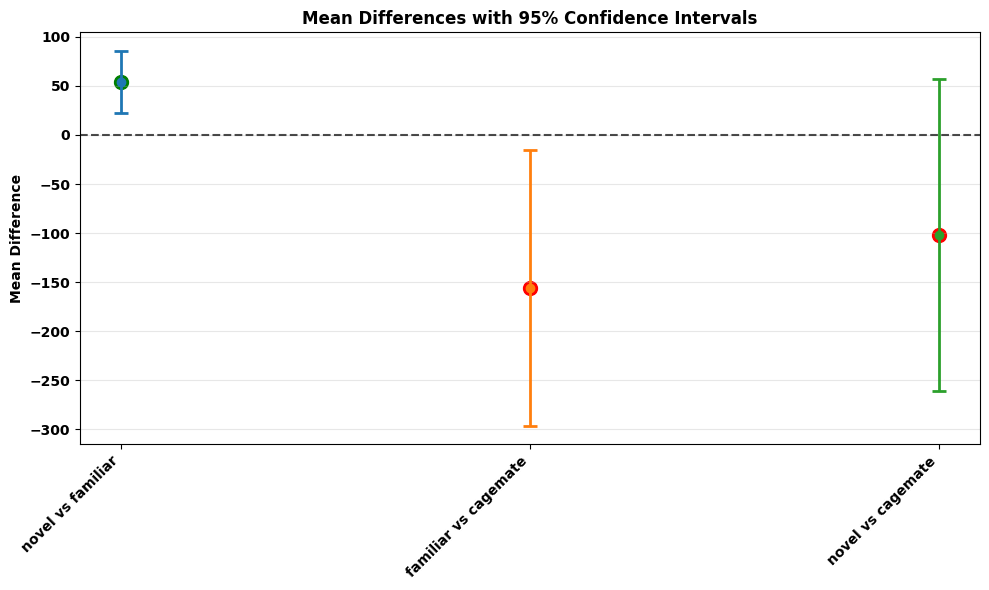

Paired t-test results with Holm-Bonferroni correction:
             Comparison  t-statistic   p-value  p-value (Holm)  Significant  \
0     novel vs familiar     3.838683  0.003975        0.011924         True   
2  familiar vs cagemate    -2.515410  0.033016        0.066033        False   
1     novel vs cagemate    -1.451680  0.180540        0.180540        False   

   Mean Difference    CI Lower   CI Upper  
0          53.7811   22.087599  85.474601  
2        -155.8611 -296.029997 -15.692203  
1        -102.0800 -261.151520  56.991520  


In [32]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

def paired_ttest_with_holm(data, conditions, subject_col='subject', value_col='value', alpha=0.05):
    """
    Perform paired t-tests between all pairs of conditions with Holm-Bonferroni correction.
    
    Parameters:
    -----------
    data : pandas DataFrame
        Data in long format with one row per subject-condition combination
    conditions : list
        List of condition names to compare
    subject_col : str
        Name of the column containing subject identifiers
    value_col : str
        Name of the column containing the measurement values
    alpha : float
        Significance level (default: 0.05)
    
    Returns:
    --------
    results_df : pandas DataFrame
        DataFrame containing the results of all pairwise comparisons
    """
    # Get all pairs of conditions
    pairs = [(c1, c2) for i, c1 in enumerate(conditions) for c2 in conditions[i+1:]]
    
    # Initialize lists to store results
    pair_names = []
    t_values = []
    p_values = []
    mean_diffs = []
    ci_lows = []
    ci_highs = []
    
    # Perform paired t-test for each pair
    for cond1, cond2 in pairs:
        # Get data for each condition, ensuring same subjects in both
        df1 = data[data['condition'] == cond1][[subject_col, value_col]].set_index(subject_col)
        df2 = data[data['condition'] == cond2][[subject_col, value_col]].set_index(subject_col)
        
        # Match subjects
        common_subjects = df1.index.intersection(df2.index)
        if len(common_subjects) == 0:
            raise ValueError(f"No common subjects found between {cond1} and {cond2}")
        
        values1 = df1.loc[common_subjects, value_col].values
        values2 = df2.loc[common_subjects, value_col].values
        
        # Perform paired t-test
        t_stat, p_val = stats.ttest_rel(values1, values2)
        
        # Calculate mean difference and confidence interval
        diff = values1 - values2
        mean_diff = np.mean(diff)
        
        # 95% confidence interval
        n = len(diff)
        sem = stats.sem(diff)
        ci_low, ci_high = stats.t.interval(1-alpha, n-1, loc=mean_diff, scale=sem)
        
        # Store results
        pair_names.append(f"{cond1} vs {cond2}")
        t_values.append(t_stat)
        p_values.append(p_val)
        mean_diffs.append(mean_diff)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
    
    # Apply Holm-Bonferroni correction
    reject, p_corrected, _, _ = multipletests(p_values, alpha=alpha, method='holm')
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Comparison': pair_names,
        't-statistic': t_values,
        'p-value': p_values,
        'p-value (Holm)': p_corrected,
        'Significant': reject,
        'Mean Difference': mean_diffs,
        'CI Lower': ci_lows,
        'CI Upper': ci_highs
    })
    
    # Sort by corrected p-value
    results_df = results_df.sort_values('p-value (Holm)')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='condition', y=data[value_col], data=data, capsize=0.1)
    sns.stripplot(x='condition', y=data[value_col], data=data, color='black', alpha=0.5)
    plt.title('Comparison of Conditions')
    plt.ylabel('Value')
    plt.xlabel('Condition')
    plt.tight_layout()
    plt.show()

    # Optional: Visualize the mean differences with confidence intervals
    plt.figure(figsize=(10, 6))
    for i, (idx, row) in enumerate(results_df.iterrows()):
        plt.errorbar(
            x=i, 
            y=row['Mean Difference'],
            yerr=[[row['Mean Difference']-row['CI Lower']], [row['CI Upper']-row['Mean Difference']]],
            fmt='o', capsize=5, capthick=2, elinewidth=2
        )
        color = 'green' if row['Significant'] else 'red'
        plt.scatter(i, row['Mean Difference'], color=color, s=100)

    plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
    plt.xticks(range(len(results_df)), results_df['Comparison'], rotation=45, ha='right')
    plt.title('Mean Differences with 95% Confidence Intervals')
    plt.ylabel('Mean Difference')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return results_df

conditions = ['novel', 'familiar', 'cagemate']
subjects = event_overview['level_0'].unique  # 10 subjects

# Run the analysis
results = paired_ttest_with_holm(total_time_long_df, conditions, subject_col='level_0', value_col='time')

# Print results
print("Paired t-test results with Holm-Bonferroni correction:")
print(results)

# Optional: Create a visualization


In [33]:
total_time_df['total social'] = total_time_df[['novel', 'familiar', 'cagemate']].sum(axis=1)
total_time_df['cagemate preference'] = total_time_df['cagemate'] / total_time_df['total social']
total_time_df['familiar preference'] = total_time_df['familiar'] / total_time_df['total social']
total_time_df['novel preference'] = total_time_df['novel'] / total_time_df['total social']

total_time_df

C:\Users\megha\AppData\Local\Temp\ipykernel_5808\2834043516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_df['total social'] = total_time_df[['novel', 'familiar', 'cagemate']].sum(axis=1)
C:\Users\megha\AppData\Local\Temp\ipykernel_5808\2834043516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_df['cagemate preference'] = total_time_df['cagemate'] / total_time_df['total social']
C:\Users\megha\AppData\Local\Temp\ipykernel_5808\2834043516.py:3: SettingWithCopyWarning: 
A value

,level_0,level_1,cup 1,cup 2,cup 3,cup 4,acquisition,empty acquisition,familiar,familiar_baseline,...,cagemate,empty,pink,orange,blue,green,total social,cagemate preference,familiar preference,novel preference
2,1.1,total time,49.266,62.735,77.133,106.933,135.531,150.932,7.400,77.133,...,102.267,42.865,100.265,45.533,87.670,125.598,230.535,0.443607,0.032099,0.524293
5,1.3,total time,81.793,85.795,185.394,49.665,103.732,254.792,25.265,49.665,...,105.463,98.132,87.670,125.598,100.265,45.533,192.194,0.548732,0.131456,0.319812
8,2.1,total time,78.335,83.132,70.735,169.931,187.465,251.925,16.330,78.335,...,353.388,69.266,100.265,45.533,87.670,125.598,425.585,0.830358,0.038371,0.131271
11,2.2,total time,88.600,107.998,118.798,119.791,113.262,315.384,15.134,119.791,...,447.237,26.999,87.670,125.598,100.265,45.533,497.904,0.898239,0.030395,0.071365
14,2.3,total time,60.464,77.596,100.392,169.793,241.457,149.859,130.797,60.464,...,122.191,96.397,100.265,45.533,87.670,125.598,393.188,0.310770,0.332658,0.356572
17,2.4,total time,34.199,59.000,82.867,85.134,130.540,129.401,36.668,34.199,...,36.335,5.266,100.265,45.533,87.670,125.598,227.869,0.159456,0.160917,0.679627
20,3.1,total time,76.064,35.930,42.532,73.468,152.335,62.463,77.932,35.930,...,28.734,24.599,87.670,125.598,100.265,45.533,294.800,0.097469,0.264355,0.638175
23,3.2,total time,55.000,37.534,98.930,40.135,113.996,133.398,9.665,37.534,...,87.866,1.066,87.670,125.598,100.265,45.533,168.864,0.520336,0.057235,0.422429
26,4.1,total time,109.724,56.492,77.593,116.120,76.860,208.116,40.926,77.593,...,128.925,55.863,100.265,45.533,87.670,125.598,226.845,0.568340,0.180414,0.251246
29,4.4,total time,45.533,87.670,125.598,100.265,158.865,238.194,6.665,125.598,...,512.987,6.332,100.265,45.533,87.670,125.598,538.984,0.951767,0.012366,0.035867


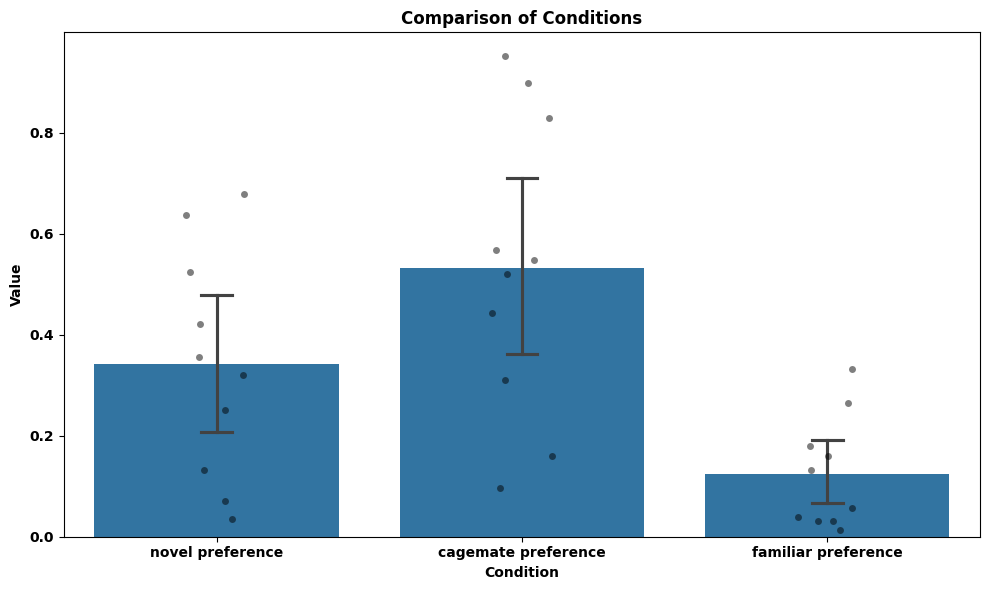

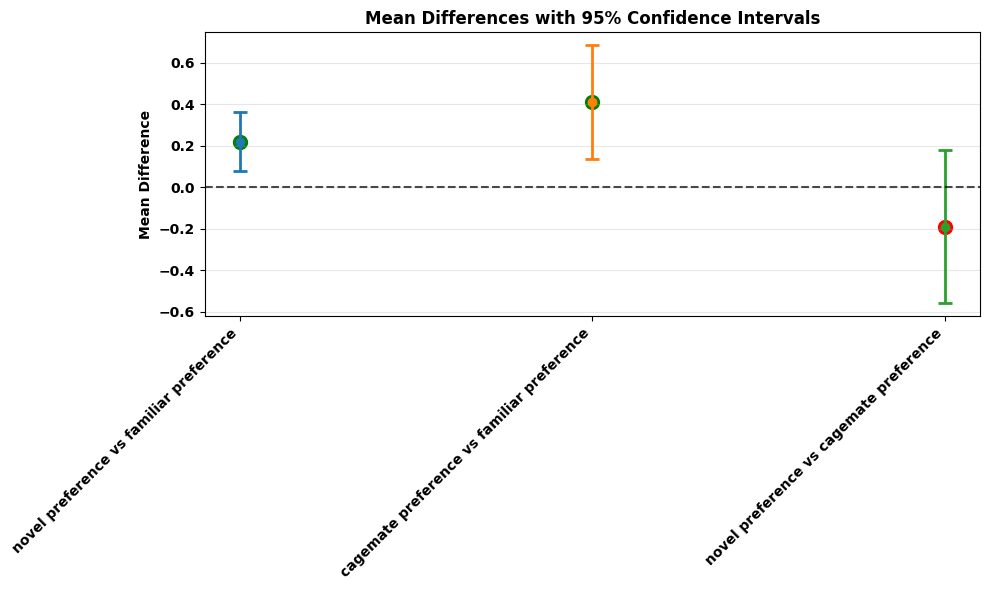

,Comparison,t-statistic,p-value,p-value (Holm),Significant,Mean Difference,CI Lower,CI Upper
1,novel preference vs familiar preference,3.479936,0.006939,0.020818,True,0.219039,0.076651,0.361427
2,cagemate preference vs familiar preference,3.366322,0.008305,0.020818,True,0.408881,0.134114,0.683647
0,novel preference vs cagemate preference,-1.166186,0.273512,0.273512,False,-0.189841,-0.558094,0.178411


In [34]:
preference_long_df = pd.melt(total_time_df, id_vars = ['level_0'],
                            value_vars = ['novel preference', 'cagemate preference','familiar preference'],
                            var_name = 'condition', value_name = 'preference')
preference_long_df
paired_ttest_with_holm(preference_long_df, ['novel preference', 'cagemate preference','familiar preference'], subject_col='level_0', value_col='preference')


In [35]:

event_agent_preference_averages = {}
avg_events = []
sem_events = []
for event in ['novel preference', 'cagemate preference','familiar preference']:
    avg_event = total_time_df[event].mean()
    sem_event = sem(total_time_df[event])
    event_agent_preference_averages[event] = (avg_event, sem_event)
    avg_events.append(avg_event)
    sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_preference_averages

event_agent_preference_averages 
avg_events = [event_agent_preference_averages['novel preference'][0], 
              event_agent_preference_averages['familiar preference'][0],
              event_agent_preference_averages['cagemate preference'][0]]
sem_events = [event_agent_preference_averages['novel preference'][1], 
              event_agent_preference_averages['familiar preference'][1],
              event_agent_preference_averages['cagemate preference'][1]]

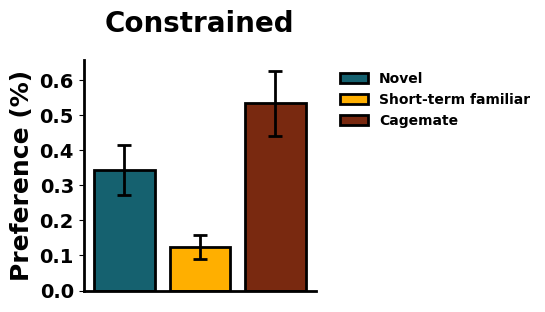

In [ ]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(color_id_dict.keys(), avg_events, yerr = sem_events,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Preference (%)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

In [36]:
data_points = []
subjects = []
behaviors = []
for subject in total_time_df['level_0'].unique():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for preference in ['novel preference','cagemate preference']:
        #iterating through event
        event_list.append(total_time_df[preference][total_time_df['level_0'] == subject].values[0])
        behaviors.append(preference)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors)
print(data_points.shape)
print(data_points.shape)

['1.1', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '4.1', '4.4']
['novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference']
(2, 10)
(2, 10)


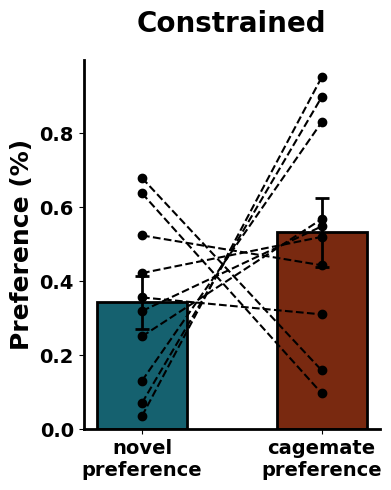

In [37]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'
plt.figure(figsize= (4,5))    
labels = ['novel\npreference', 'cagemate\npreference']
# Create the bar plot
plt.bar([0,1], [avg_events[0], avg_events[2]],
        yerr=[sem_events[0],
        sem_events[2]],
        capsize=5,
         linewidth = 2,
        error_kw={'elinewidth': 2, 'capthick': 2},
        color=['#15616F', '#792910'], edgecolor='black',
        width = 0.5)
# for i, group_data in enumerate(data_points):
#     print(behaviors[i])
#     print(data_points[i])
#     # Spread the points a little horizontally to avoid overlap (add a small random jitter)
#     jitter = np.random.normal(0, 0.02, size=len(group_data))
#     plt.scatter([i + jitter_val for jitter_val in jitter], group_data, color='red', zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Add labels and title
plt.xticks([0,1], labels, rotation = 0)
plt.ylabel('Preference (%)', fontsize = 18)


# Show the plot
plt.tight_layout()
plt.show()

In [38]:
avg_event_df_trim = avg_event_df[[ 'novel','familiar', 'cagemate']]
avg_event_df_trim


,novel,familiar,cagemate
1,6.714889,2.466667,5.113350
4,4.728154,2.296818,3.906037
7,3.103722,1.814444,7.212000
10,7.106600,2.162000,8.282167
13,7.378947,4.510241,3.941645
16,2.716947,1.746095,1.513958
19,3.188712,3.247167,3.591750
22,6.484818,1.073889,4.393300
25,2.110889,1.637040,3.484459
28,3.222000,1.333000,20.519480


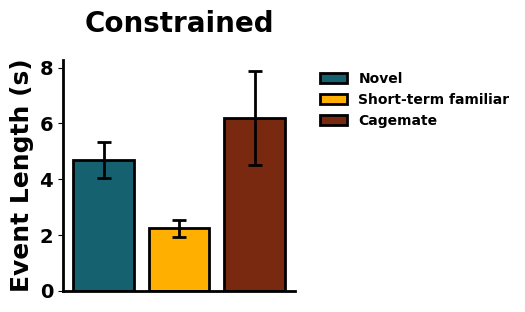

In [39]:



plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(avg_event_df_trim.mean().index, avg_event_df_trim.mean().values, yerr = avg_event_df_trim.sem().values,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Event Length (s)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

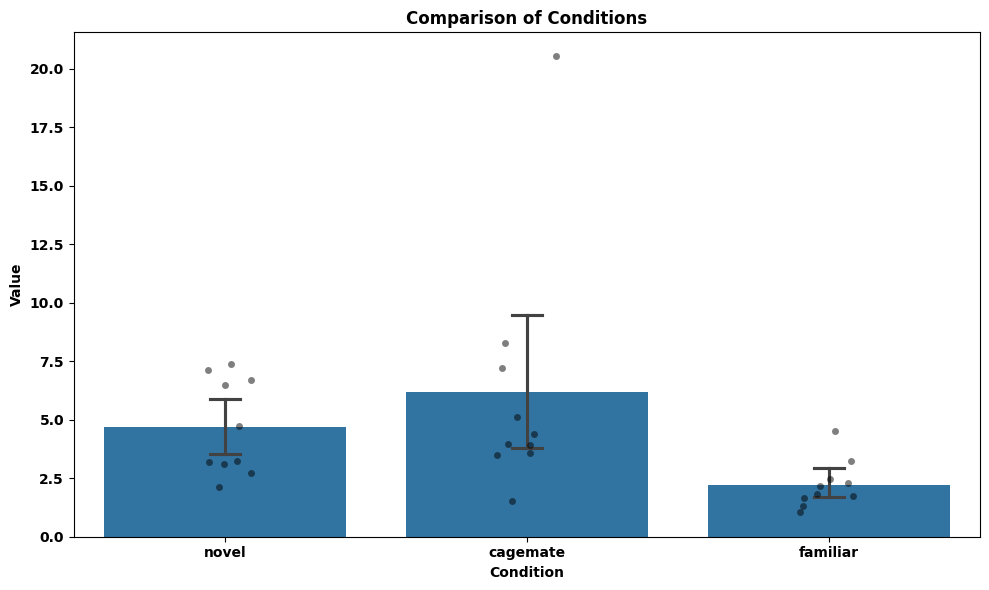

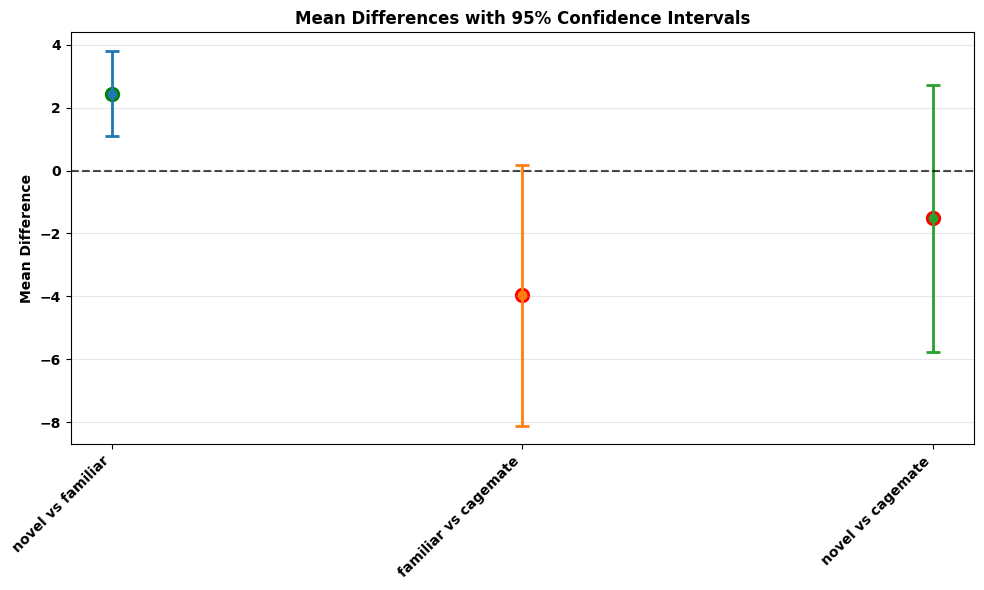

,Comparison,t-statistic,p-value,p-value (Holm),Significant,Mean Difference,CI Lower,CI Upper
0,novel vs familiar,4.075118,0.002778,0.008335,True,2.446832,1.088560,3.805104
2,familiar vs cagemate,-2.166169,0.058477,0.116954,False,-3.967079,-8.109949,0.175791
1,novel vs cagemate,-0.809684,0.439004,0.439004,False,-1.520247,-5.767629,2.727136


In [40]:

avg_event_long_df = pd.melt(avg_event_df, id_vars = ['level_0'],
                            value_vars = ['novel', 'cagemate','familiar'],
                            var_name = 'condition', value_name = 'time')

conditions = ['novel', 'familiar', 'cagemate']
subjects = event_overview['level_0'].unique  # 10 subjects

# Run the analysis
paired_ttest_with_holm(avg_event_long_df, conditions, subject_col='level_0', value_col='time')


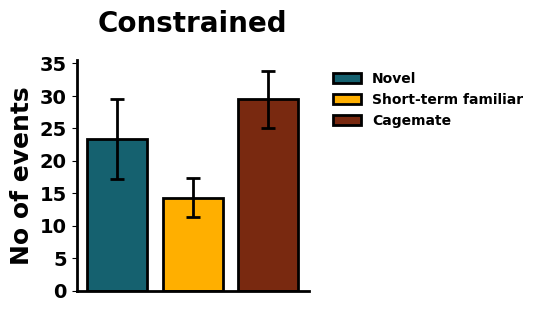

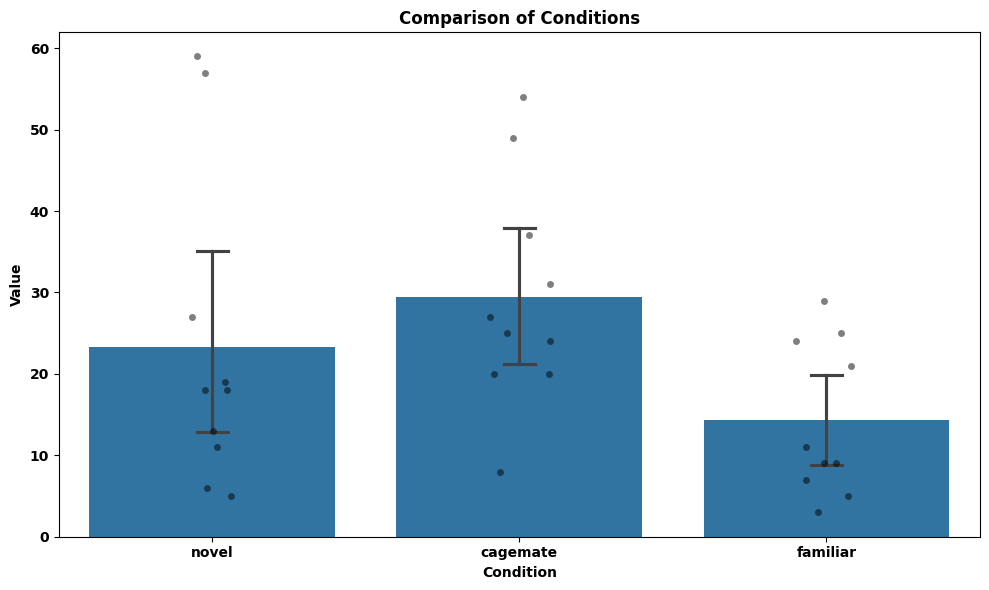

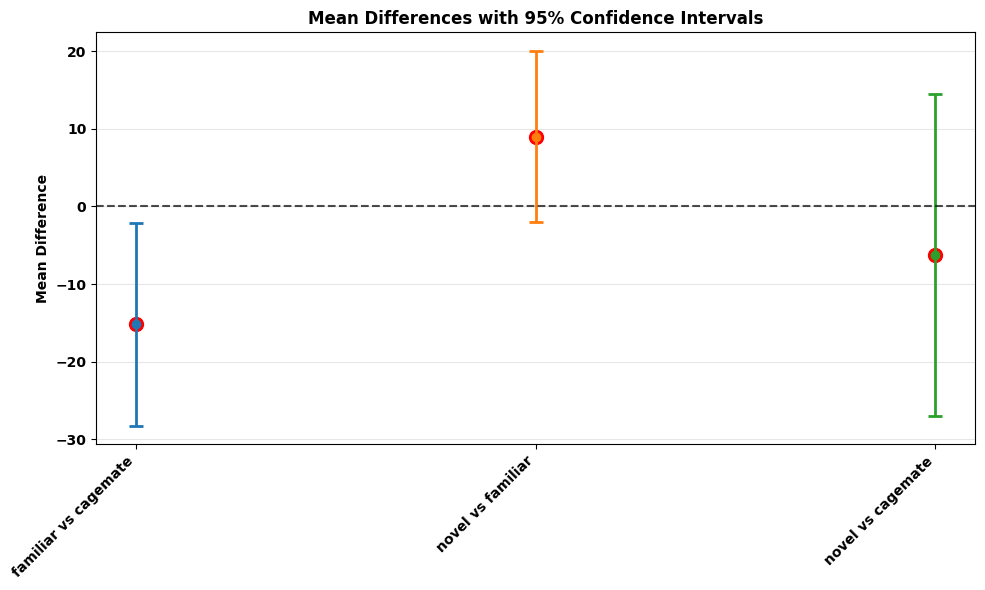

,Comparison,t-statistic,p-value,p-value (Holm),Significant,Mean Difference,CI Lower,CI Upper
2,familiar vs cagemate,-2.642601,0.026799,0.080398,False,-15.2,-28.211720,-2.188280
0,novel vs familiar,1.848275,0.097619,0.195237,False,9.0,-2.015361,20.015361
1,novel vs cagemate,-0.676762,0.515572,0.515572,False,-6.2,-26.924235,14.524235


In [41]:
no_events_df_trim = no_events_df[[ 'novel','familiar', 'cagemate']]


plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(no_events_df_trim.mean().index, no_events_df_trim.mean().values, yerr = no_events_df_trim.sem().values,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('No of events', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

no_events_long_df = pd.melt(no_events_df, id_vars = ['level_0'],
                            value_vars = ['novel', 'cagemate','familiar'],
                            var_name = 'condition', value_name = 'no events')

conditions = ['novel', 'familiar', 'cagemate']
subjects = event_overview['level_0'].unique  # 10 subjects

# Run the analysis
paired_ttest_with_holm(no_events_long_df, conditions, subject_col='level_0', value_col='no events')